In [ ]:
#prepare for the other combinations for DBSCAN=>numerical 'travelto' and 'travelfrom'

#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='2featuresout.csv'
df = pd.read_csv(file)
print(df.describe()) #statistics 

         Unnamed: 0  totaltraveltimeinhours  ...  totalwaitingtime      distance
count  85153.000000            85153.000000  ...      85153.000000  85153.000000
mean   42576.000000                4.272064  ...          0.472406    274.130645
std    24581.698073                2.947939  ...          1.443252    142.227904
min        0.000000                0.120000  ...          0.000000      7.404000
25%    21288.000000                2.320000  ...          0.000000    151.326000
50%    42576.000000                3.740000  ...          0.000000    298.728000
75%    63864.000000                5.440000  ...          0.130000    387.940000
max    85152.000000               25.000000  ...         21.290000    609.816000

[8 rows x 7 columns]


In [ ]:
#incorporate the dataset meta_city_size for changing the approach with the columns with respect to population
file='metacitysize.csv'
dfcity = pd.read_csv(file)
print(dfcity.describe())

       Unnamed: 0      postcode  ...  population_female  population_density_per_km2
count   29.000000     29.000000  ...       2.900000e+01                   29.000000
mean    34.103448  58150.862069  ...       2.806543e+05                 2156.862069
std     25.400147  25053.438248  ...       3.693831e+05                  881.964638
min      6.000000   4109.000000  ...       3.960900e+04                  792.000000
25%     14.000000  44787.000000  ...       8.474800e+04                 1459.000000
50%     26.000000  52062.000000  ...       1.554590e+05                 2108.000000
75%     53.000000  76124.000000  ...       2.992460e+05                 2675.000000
max    113.000000  99084.000000  ...       1.862050e+06                 4790.000000

[8 rows x 7 columns]


In [ ]:
dfcity#check the dataset

Unnamed: 0           city  ...  population_density_per_km2  size_category
0            6         Berlin  ...                        4112     metropolis
1            7        Hamburg  ...                        2453     metropolis
2            8        München  ...                        4790     metropolis
3            9           Köln  ...                        2675     metropolis
4           11      Stuttgart  ...                        3040       big_city
5           12     Düsseldorf  ...                        2854       big_city
6           13        Leipzig  ...                        2006       big_city
7           14       Dortmund  ...                        2094       big_city
8           15          Essen  ...                        2769       big_city
9           19       Nürnberg  ...                        2765       big_city
10          20       Duisburg  ...                        2130       big_city
11          21         Bochum  ...                        2502       big_city
12          22      Wuppertal  ...                        2108       big_city
13          24           Bonn  ...                        2344       big_city
14          26       Mannheim  ...                        2136       big_city
15          27      Karlsruhe  ...                        1779       big_city
16          31  Gelsenkirchen  ...                        2469       big_city
17          32         Aachen  ...                        1547       big_city
18          42         Erfurt  ...                         792       big_city
19          43     Oberhausen  ...                        2718       big_city
20          46          Hagen  ...                        1176       big_city
21          53      Osnabrück  ...                        1371       big_city
22          55       Solingen  ...                        1778       big_city
23          56      Darmstadt  ...                        1304       big_city
24          57     Heidelberg  ...                        1459       big_city
25          65       Würzburg  ...                        1449       big_city
26          67            Ulm  ...                        1065       big_city
27          75       Erlangen  ...                        1460       big_city
28         113        Bamberg  ...                        1404     small_city

[29 rows x 9 columns]

In [ ]:
#create 2 new numerical columns travel from and travel to with respect to population size of the cities for the customer
df['numtravelfrom'] = "null"
df['numtravelto'] = "null"

df

Unnamed: 0  totaltraveltimeinhours  ...  numtravelfrom  numtravelto
0               0                    0.39  ...           null         null
1               1                    0.13  ...           null         null
2               2                    0.13  ...           null         null
3               3                    0.39  ...           null         null
4               4                    0.39  ...           null         null
...           ...                     ...  ...            ...          ...
85148       85148                    5.17  ...           null         null
85149       85149                    6.13  ...           null         null
85150       85150                    4.54  ...           null         null
85151       85151                    4.54  ...           null         null
85152       85152                    3.62  ...           null         null

[85153 rows x 17 columns]

In [ ]:
#populate our common dataframe with + numerical features based on aligment with another df regarding cities:
for i in range(0, len(df)):
  for j in range(0, len(dfcity)):
    if df ["sourcename"].values[i] == dfcity ["city"].values[j]:
      df['numtravelfrom'].values[i] = dfcity ["population_total"].values[j]
    elif df ["targetname"].values[i] == dfcity ["city"].values[j]:
      df['numtravelto'].values[i] = dfcity ["population_total"].values[j]

In [ ]:
#check the frame
df

Unnamed: 0  totaltraveltimeinhours  ...  numtravelfrom  numtravelto
0               0                    0.39  ...         582415       259105
1               1                    0.13  ...         582415       259105
2               2                    0.13  ...         582415       259105
3               3                    0.39  ...         582415       259105
4               4                    0.39  ...         582415       259105
...           ...                     ...  ...            ...          ...
85148       85148                    5.17  ...         126954       209566
85149       85149                    6.13  ...         126954       209566
85150       85150                    4.54  ...         126954       209566
85151       85151                    4.54  ...         126954       209566
85152       85152                    3.62  ...         126954       209566

[85153 rows x 17 columns]

Would NOT reduce the outliers since the DBSCAN is supposed to catch them via -1 cluster, it could properly handle the noise

In [ ]:
#mapping to numerical population-correct?check the numbers!
df.loc[df['sourcename'] == 'Hamburg']

Unnamed: 0  totaltraveltimeinhours  ...  numtravelfrom  numtravelto
4670         4670                   13.83  ...        1852478       495885
4671         4671                    9.90  ...        1852478       495885
4672         4672                    7.83  ...        1852478       495885
4673         4673                    7.00  ...        1852478       495885
4674         4674                    5.85  ...        1852478       495885
...           ...                     ...  ...            ...          ...
82256       82256                    5.35  ...        1852478       597493
82257       82257                    6.47  ...        1852478       597493
82258       82258                    5.36  ...        1852478       597493
82259       82259                    6.04  ...        1852478       597493
82260       82260                    5.43  ...        1852478       597493

[5996 rows x 17 columns]

fully alligned with the dataset

In [ ]:
#redundant column via reading
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df

totaltraveltimeinhours  totalprice  ...  numtravelfrom  numtravelto
0                        0.39        0.86  ...         582415       259105
1                        0.13        2.17  ...         582415       259105
2                        0.13        2.17  ...         582415       259105
3                        0.39        0.86  ...         582415       259105
4                        0.39        0.86  ...         582415       259105
...                       ...         ...  ...            ...          ...
85148                    5.17       91.20  ...         126954       209566
85149                    6.13       86.04  ...         126954       209566
85150                    4.54       22.47  ...         126954       209566
85151                    4.54       22.47  ...         126954       209566
85152                    3.62      109.02  ...         126954       209566

[85153 rows x 16 columns]

In [ ]:
#no missing values
df.isna().sum()

totaltraveltimeinhours     0
totalprice                 0
totalnumberofchanges       0
totalwalkingdistance       0
totalwaitingtime           0
objective                  0
finiteautomaton            0
consideredpreferences      0
finalsolutionusedlabels    0
sourcename                 0
targetname                 0
distance                   0
travelfrom                 0
travelto                   0
numtravelfrom              0
numtravelto                0
dtype: int64

In [ ]:

df.drop(df.columns[[5, 9, 10, 12, 13]], axis = 1, inplace = True) #drop 5 columns +2 additionally

Define what columns we need to drop for the clustering

goal is to cluster the group of trips and see maybe we can detect some new patterns in the data based on clusters, was decided to drop column objective-super low degree of association-0,05.. doesnt have any meaningfull information for clustering, we have completely identical rows with all numerical/categorical variables (having the same labesls) with difference only in objective=> it doesnt change anything, it also repeats somehow the combinations inside the 'considered preferences" column, whoch we will use for clustering

Drop sourcename and targetname for the algorithm- we would need to consider the groups of trips in Germany in general, use the same dropping approach as for kprototypes

PLUS also categorical travelfrom and travelto got dropped-we will use numerical replacements to check the behavious of the alghorithm

In [ ]:
#the duplicates were removed
df.drop_duplicates(keep='last', inplace=True)

From 85153 to 30486 thousands of rows (mainly because of reducing the objective column) +20 rows in comparison to datatset with categorical(travel from and travel to)

In [ ]:
#save dataset for KNIME to compare later in Knime dbscan behaviour (included in report)
from google.colab import files
df.to_csv('num2featuresout.csv') 
files.download('num2featuresout.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#copy of data for encoding
encoding=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder #encode the values
labelencoder = LabelEncoder()

#use label encoding for the column considered preferences because it has the order
encoding['consideredpreferences'] = labelencoder.fit_transform(encoding['consideredpreferences'])#fit label encoder and return encoded labels for the first target column
#use label encoding because we have too many values for one hot encoding for solutionlabels-33 unique combinatios
encoding['finalsolutionusedlabels'] = labelencoder.fit_transform(encoding['finalsolutionusedlabels'])#Fit label encoder and return encoded labels for the second one


encoding.head(10)

totaltraveltimeinhours  totalprice  ...  numtravelfrom  numtravelto
2                     0.13        2.17  ...         582415       259105
3                     0.39        0.86  ...         582415       259105
6                     0.13        2.89  ...         582415       259105
7                     0.13        2.17  ...         582415       259105
8                     0.39        0.86  ...         582415       259105
11                    0.13        2.89  ...         582415       259105
12                    0.13        2.17  ...         582415       259105
13                    0.39        0.86  ...         582415       259105
18                    0.25        3.83  ...         582415       259105
20                    0.13        2.89  ...         582415       259105

[10 rows x 11 columns]

In [ ]:
#use all the features to cluster the observations
categorical_col= ["finiteautomaton"] #no order-usage of dummy encoding
transformed = pd.get_dummies(encoding, columns=categorical_col)#convert categorical target our automation

#check what we have got as the result
transformed.head(10)

totaltraveltimeinhours  ...  finiteautomaton_ptOnly
2                     0.13  ...                       0
3                     0.39  ...                       0
6                     0.13  ...                       1
7                     0.13  ...                       1
8                     0.39  ...                       1
11                    0.13  ...                       0
12                    0.13  ...                       0
13                    0.39  ...                       0
18                    0.25  ...                       0
20                    0.13  ...                       0

[10 rows x 13 columns]

Got our transformed dataset to plug it into dbscan algorithm and check the clusters

In [ ]:
#check the dataset
transformed

totaltraveltimeinhours  ...  finiteautomaton_ptOnly
2                        0.13  ...                       0
3                        0.39  ...                       0
6                        0.13  ...                       1
7                        0.13  ...                       1
8                        0.39  ...                       1
...                       ...  ...                     ...
85147                    3.63  ...                       1
85148                    5.17  ...                       1
85149                    6.13  ...                       1
85151                    4.54  ...                       0
85152                    3.62  ...                       0

[30486 rows x 13 columns]

In [ ]:
#transformation
transformed['numtravelfrom'] = pd.to_numeric(transformed['numtravelfrom'])
transformed['numtravelto'] = pd.to_numeric(transformed['numtravelto'])

The problem was that the datatype of 'numtravelfrom' and 'numtravelto' are objects and we cant investigate the correlations=we transform them to integers

In [ ]:
correlation_df = transformed.corr()
#calculate all correlations in df via table

correlation_df

totaltraveltimeinhours  ...  finiteautomaton_ptOnly
totaltraveltimeinhours                   1.000000  ...                0.044674
totalprice                               0.027155  ...                0.006327
totalnumberofchanges                     0.397491  ...                0.135972
totalwalkingdistance                     0.297080  ...                0.044977
totalwaitingtime                         0.453474  ...                0.059620
consideredpreferences                   -0.090498  ...               -0.069361
finalsolutionusedlabels                 -0.078293  ...                0.095024
distance                                 0.431094  ...               -0.029162
numtravelfrom                            0.071509  ...               -0.039751
numtravelto                              0.087175  ...               -0.031210
finiteautomaton_all                     -0.037376  ...               -0.517632
finiteautomaton_noFlights               -0.009759  ...               -0.533741
finiteautomaton_ptOnly                   0.044674  ...                1.000000

[13 rows x 13 columns]

In [ ]:
#check again the datatypes
transformed.dtypes

totaltraveltimeinhours       float64
totalprice                   float64
totalnumberofchanges           int64
totalwalkingdistance         float64
totalwaitingtime             float64
consideredpreferences          int64
finalsolutionusedlabels        int64
distance                     float64
numtravelfrom                  int64
numtravelto                    int64
finiteautomaton_all            uint8
finiteautomaton_noFlights      uint8
finiteautomaton_ptOnly         uint8
dtype: object

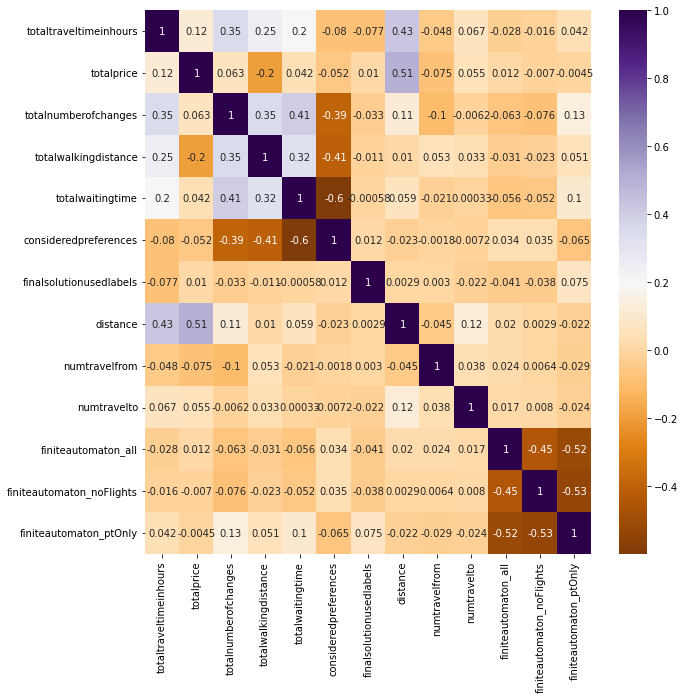

In [ ]:
#create the second correlation matrix using our transformed categorical data plus numerical data
show=transformed.corr(method='kendall')#pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='PuOr')


Strong negative correlation between preferences and walikngdistance&waitingtime&transfers=> our minimisation boundaries, new correlation between distance and traveltime(moderate degree) and distance and price(high degree) was revealed, super small correlation for numerical travelfrom and travelto population size

In [ ]:
#import further libraries for DBscan
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn import metrics # for calculating Silhouette score

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

from sklearn.cluster import DBSCAN

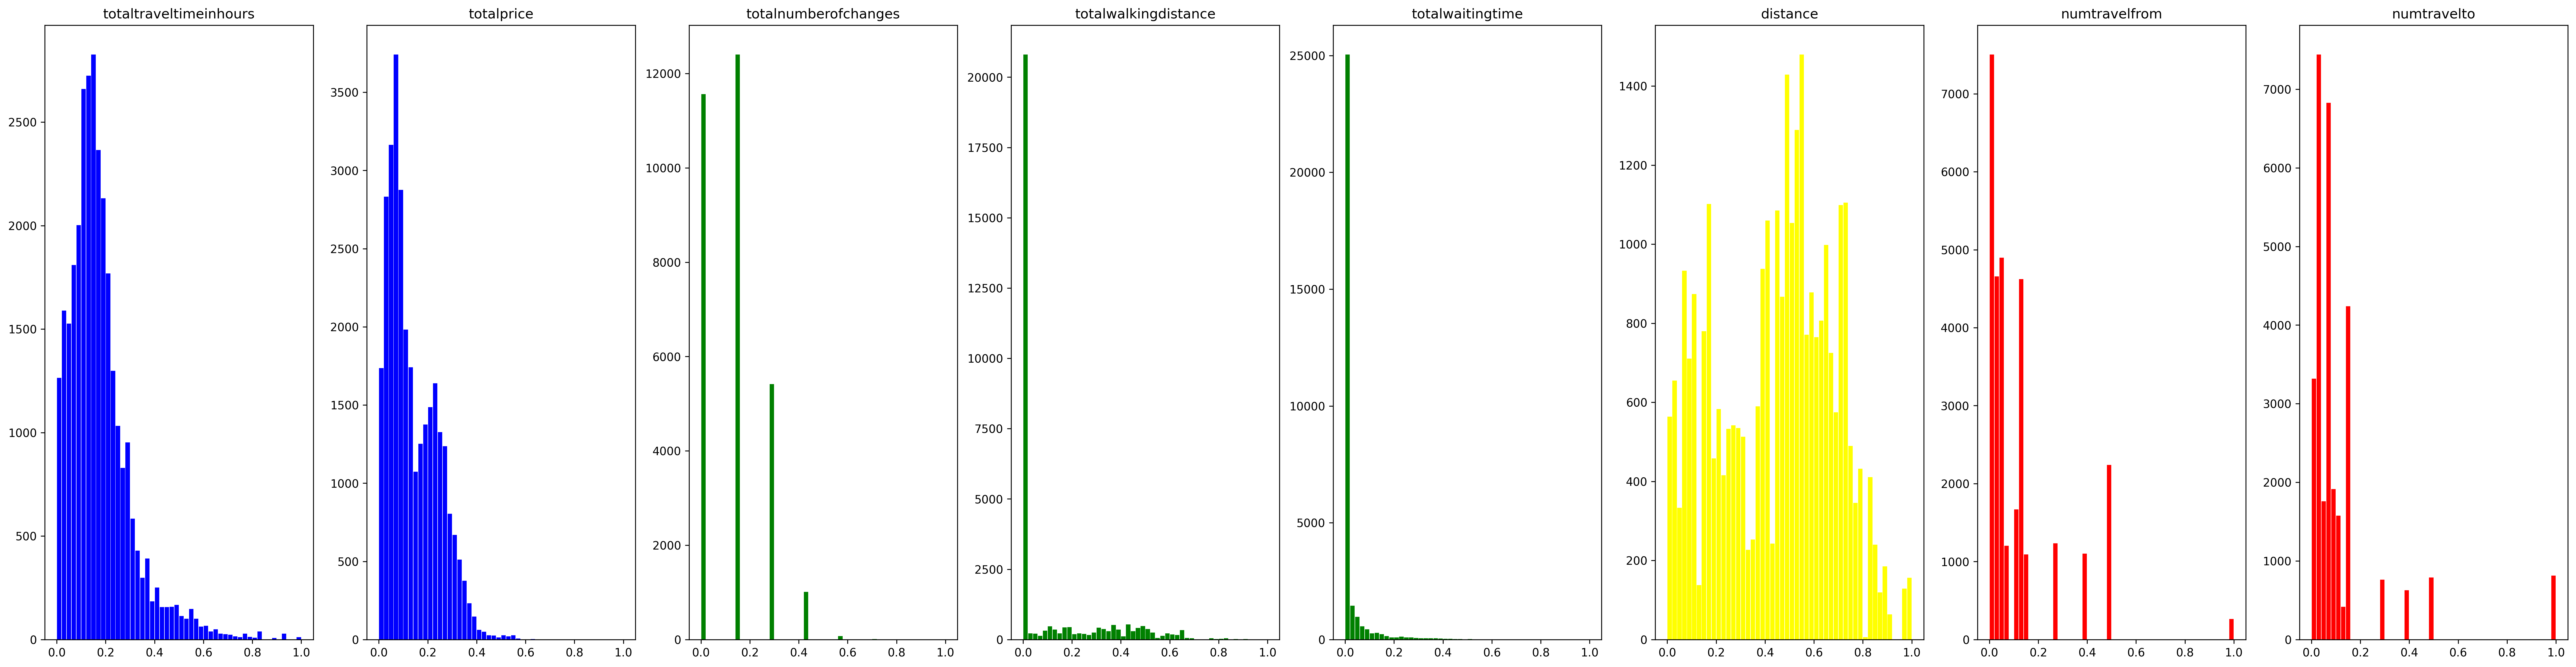

In [ ]:
#to scale the features utilized min-max scaler because data distribution is not normal (not fit a gaussian distribution)
scaler = MinMaxScaler()
transformed_scaled = scaler.fit_transform(transformed) #apply the Scaler

# plot the min-max scaled distributions (dataset is combined)

fig, axs = plt.subplots(1, 8, figsize=(40,10), dpi=300)
axs[0].hist(transformed_scaled[:,0], bins=50, color='blue', rwidth=0.9)
axs[0].set_title('totaltraveltimeinhours')
axs[1].hist(transformed_scaled[:,1], bins=50, color='blue', rwidth=0.9)
axs[1].set_title('totalprice')
axs[2].hist(transformed_scaled[:,2], bins=50, color='green', rwidth=0.9)
axs[2].set_title('totalnumberofchanges')
axs[3].hist(transformed_scaled[:,3], bins=50, color='green', rwidth=0.9)
axs[3].set_title('totalwalkingdistance')
axs[4].hist(transformed_scaled[:,4], bins=50, color='green', rwidth=0.9)
axs[4].set_title('totalwaitingtime')
axs[5].hist(transformed_scaled[:,7], bins=50, color='yellow', rwidth=0.9)
axs[5].set_title('distance')
axs[6].hist(transformed_scaled[:,8], bins=50, color='red', rwidth=0.9)
axs[6].set_title('numtravelfrom')
axs[7].hist(transformed_scaled[:,9], bins=50, color='red', rwidth=0.9)
axs[7].set_title('numtravelto')

plt.show()

Control that all of them are between 1 and 0, including the newest incorporated feature 'distance', as well as numerical population from travelling from and to

In [ ]:
#verify the final array
transformed_scaled

array([[4.01929260e-04, 4.00530357e-03, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08520900e-02, 3.86718966e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.01929260e-04, 5.99414397e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.41559486e-01, 2.35677587e-01, 1.42857143e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.77652733e-01, 6.00795536e-02, 1.42857143e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40675241e-01, 2.99154743e-01, 1.42857143e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
#check the shape
transformed_scaled.shape


(30486, 13)

30486 rows and 13 columns, including encoded ones

If data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)=13*2=26

In [ ]:

from sklearn.neighbors import NearestNeighbors #for NN approach
from matplotlib import pyplot as plt
#selected 26minpts
neighbors = NearestNeighbors(n_neighbors=26) #13*2
neighbors_fit = neighbors.fit(transformed_scaled)
distances, indices = neighbors_fit.kneighbors(transformed_scaled)

To elaborate more on epsilon calculate the average distance between each point in the data set and its 26th nearest neighbors ( selected minpts value)

references https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

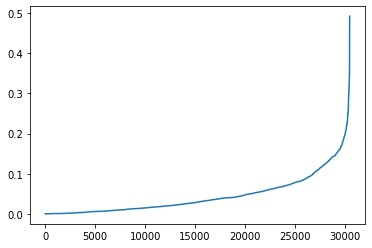

In [ ]:
#sort distance values by ascending value and plot

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Assume that optimal eps would be at the max curvature- 0.08-0.15 - we will try a loop

In [ ]:
#try the second approach
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(transformed_scaled)
distances, indices = nbrs.kneighbors(transformed_scaled)

Calculate the distance from each point to its closest neighbour using the NearestNeighbors, the point itself is included in n_neighbors

The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points

references https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

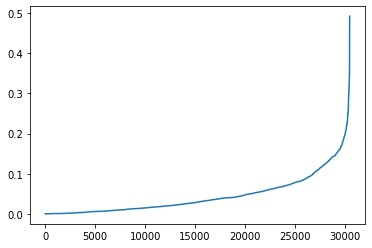

In [ ]:
#sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

optimal eps should be 0,08-0,15 and we will also try a loop with different combinations to compare Silhouette there

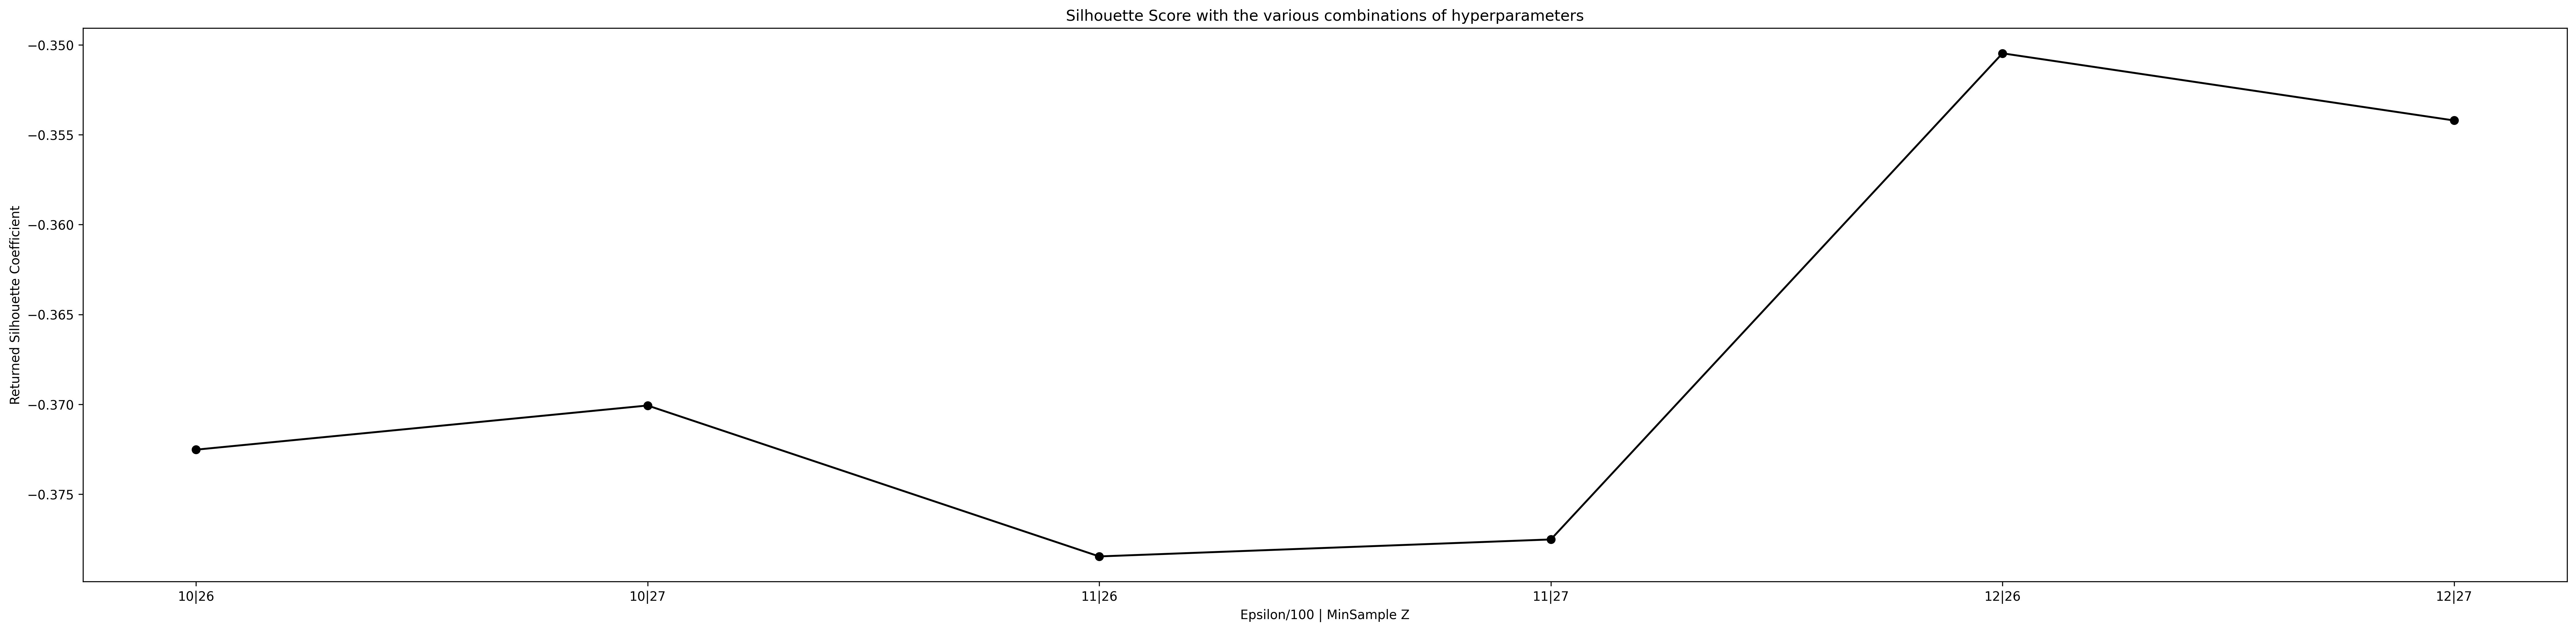

In [ ]:
#test different hyperparameter values for DBscan- the highest Silhouette score -we will use for clustering these parameters
# empty lists

SS=[] # to store inside different Silhouette scores
# to save results of various epsilon and min_samples
combinations=[] 

# ranges to choose
# we will choose different suitables ranges to test
eps_range=range(10,13) # 0.1 - 0,13 range

minpts_range=range(26,28) #rule of thumb-choose based on number of dimensions (dim+1 as min), or even more dim*2

for k in eps_range:
    for j in minpts_range:
        # model and parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # fitting the model 
        clm = model.fit(transformed_scaled)
        # calculation of Silhoutte Score and appending it to the list
        SS.append(metrics.silhouette_score(transformed_scaled, clm.labels_, metric='euclidean'))
        combinations.append(str(k)+"|"+str(j)) # axis values for the graph

# plotting the results of Silhouette scores to make a decision
plt.figure(figsize=(35,8), dpi=300)
plt.plot(combinations, SS, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinSample Z')
plt.ylabel('Returned Silhouette Coefficient')
plt.title('Silhouette Score with the various combinations of hyperparameters')
plt.show()


Running time is 1 minute, Silhouette is negative


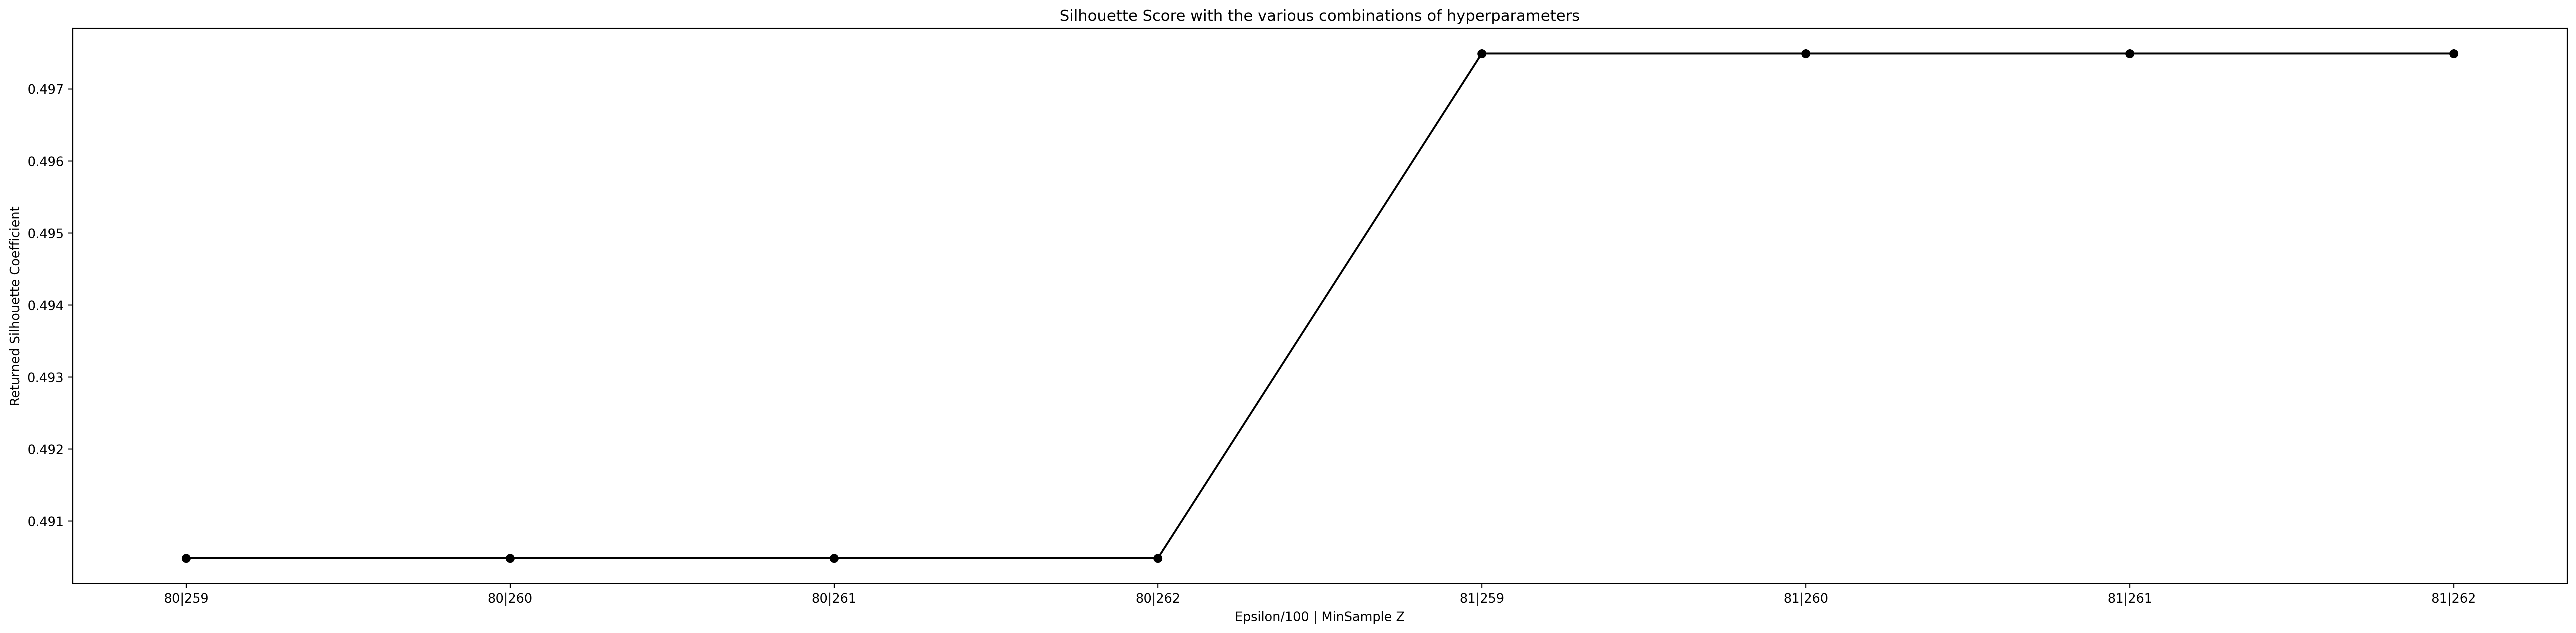

In [ ]:
#test different hyperparameter values for DBscan- the highest Silhouette score -we will use for clustering these parameters
# empty lists

SS=[] # to store inside different Silhouette scores
# to save results of various epsilon and min_samples
combinations=[] 

# ranges to choose
# we will choose different suitables ranges to test
eps_range=range(80,82) # 0.8 - 0,82 range

minpts_range=range(259,263) #rule of thumb-choose based on number of dimensions (dim+1 as min), or even more dim*2

for k in eps_range:
    for j in minpts_range:
        # model and parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # fitting the model 
        clm = model.fit(transformed_scaled)
        # calculation of Silhoutte Score and appending it to the list
        SS.append(metrics.silhouette_score(transformed_scaled, clm.labels_, metric='euclidean'))
        combinations.append(str(k)+"|"+str(j)) # axis values for the graph

# plotting the results of Silhouette scores to make a decision
plt.figure(figsize=(35,8), dpi=300)
plt.plot(combinations, SS, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinSample Z')
plt.ylabel('Returned Silhouette Coefficient')
plt.title('Silhouette Score with the various combinations of hyperparameters')
plt.show()


Running time is 3 minutes again using the same greed search approach plotting versus Silhouette and looping, the best coefficient 0,497-we will use eps=0,81 and minpts=262

In [ ]:
#eventually use for the model: eps=0.81, MinPts=262 (almost the same when the categorical encoded columns were involved)

modeldb = DBSCAN(eps=0.81, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=262, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=None, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )



# fit our model
clustm = modeldb.fit(transformed_scaled)


# check the results
print('DBSCAN Clustering Model ')
print("Cluster labels for the first model")
print(clustm.labels_)



DBSCAN Clustering Model 
Cluster labels for the first model
[0 0 1 ... 1 2 2]


3 clusters were formed, having no -1 means that we have no noise being identified by the algorithm, 3 groups

In [ ]:
#assign clusters to the data frame for further analysis of groups via plots
df['DBSCAN cluster']=clustm.labels_
df

totaltraveltimeinhours  totalprice  ...  numtravelto  DBSCAN cluster
2                        0.13        2.17  ...       259105               0
3                        0.39        0.86  ...       259105               0
6                        0.13        2.89  ...       259105               1
7                        0.13        2.17  ...       259105               1
8                        0.39        0.86  ...       259105               1
...                       ...         ...  ...          ...             ...
85147                    3.63      106.46  ...       209566               1
85148                    5.17       91.20  ...       209566               1
85149                    6.13       86.04  ...       209566               1
85151                    4.54       22.47  ...       209566               2
85152                    3.62      109.02  ...       209566               2

[30486 rows x 12 columns]

In [ ]:
#3 groups again 
a = df['DBSCAN cluster'].unique()
a

array([0, 1, 2])

no noise points were assigned

In [ ]:
# plot the clusters in 3d environment with the colors assigned per cluster
df=df.sort_values(by=['DBSCAN cluster'])

# 3d scatter plot
fig = px.scatter_3d(df, x=df['totalprice'], y=df['totaltraveltimeinhours'], z=df['distance'], 
                    opacity=1, color=df['DBSCAN cluster'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['totalwalkingdistance', 'totalwaitingtime'],
                    width=900, height=900
                   )

# chart
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# change marker size
fig.update_traces(marker=dict(size=2))

fig.show()


With the silhouette almost 0,5 we can conclude that clusters are not that indifferent , distance between them could be significant

1st black group moderate with respect to 3 parameters

hard to evaluate 2 other wrt to 3 dim graph

In [ ]:
# plot the clusters in 3d environment with the colors assigned per cluster
df=df.sort_values(by=['DBSCAN cluster'])

# 3d scatter plot
fig = px.scatter_3d(df, x=df['totalprice'], y=df['totaltraveltimeinhours'], z=df['totalnumberofchanges'], #usage of another third column
                    opacity=1, color=df['DBSCAN cluster'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['totalwalkingdistance', 'totalwaitingtime'],
                    width=900, height=900
                   )

# chart
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# change marker size
fig.update_traces(marker=dict(size=2))

fig.show()


With the silhouette almost 0,5 we can conclude that clusters are not that indifferent , distance between them could be significant, more changes for the second group,less travel time, but high price, less changes for the 3d group, travel time is hogh but the price is moderate, black first group-not high price and moderate traveltime&changes

In [ ]:
#check how many instances belong to the cluster
print(pd.Series(clustm.labels_).value_counts())


1    11641
2     9622
0     9223
dtype: int64


second group is the biggest

In [ ]:
df['DBSCAN cluster']=clustm.labels_

In [ ]:
#0,1,2 our 3 groups
clustm.labels_

array([0, 0, 1, ..., 1, 2, 2])

In [ ]:
#to plot 2 dimensions
dbscan=DBSCAN(eps=0.81, min_samples=262)

In [ ]:
lables=dbscan.fit_predict(transformed_scaled)

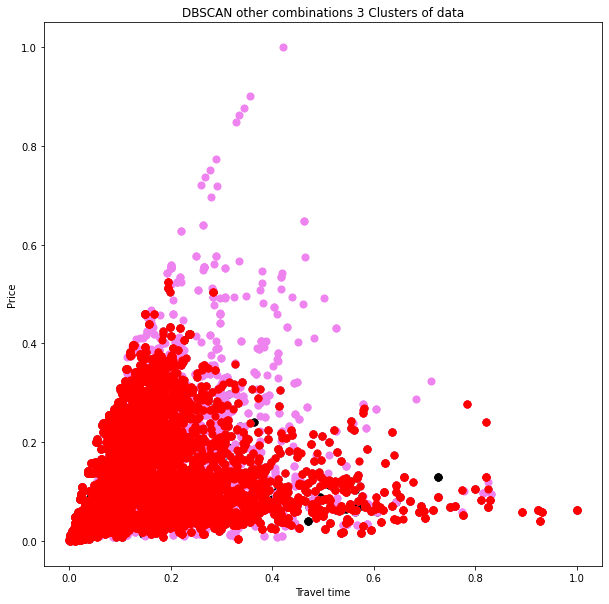

In [ ]:
#2 dimensions with scaled clusters
lables=dbscan.fit_predict(transformed_scaled)
plt.figure(figsize=(10, 10))
plt.scatter(transformed_scaled[lables == 0, 0], transformed_scaled[lables == 0, 1], s = 50, c = 'black') #use the color
plt.scatter(transformed_scaled[lables == 1, 0], transformed_scaled[lables == 1, 1], s = 50, c = 'violet')
plt.scatter(transformed_scaled[lables == 2, 0], transformed_scaled[lables == 2, 1], s = 50, c = 'red')

plt.xlabel('Travel time')
plt.ylabel('Price')
plt.title('DBSCAN other combinations 3 Clusters of data')
plt.show()

Highest price for pink-second (violet), highest travel time for third (red), moderate first(black)

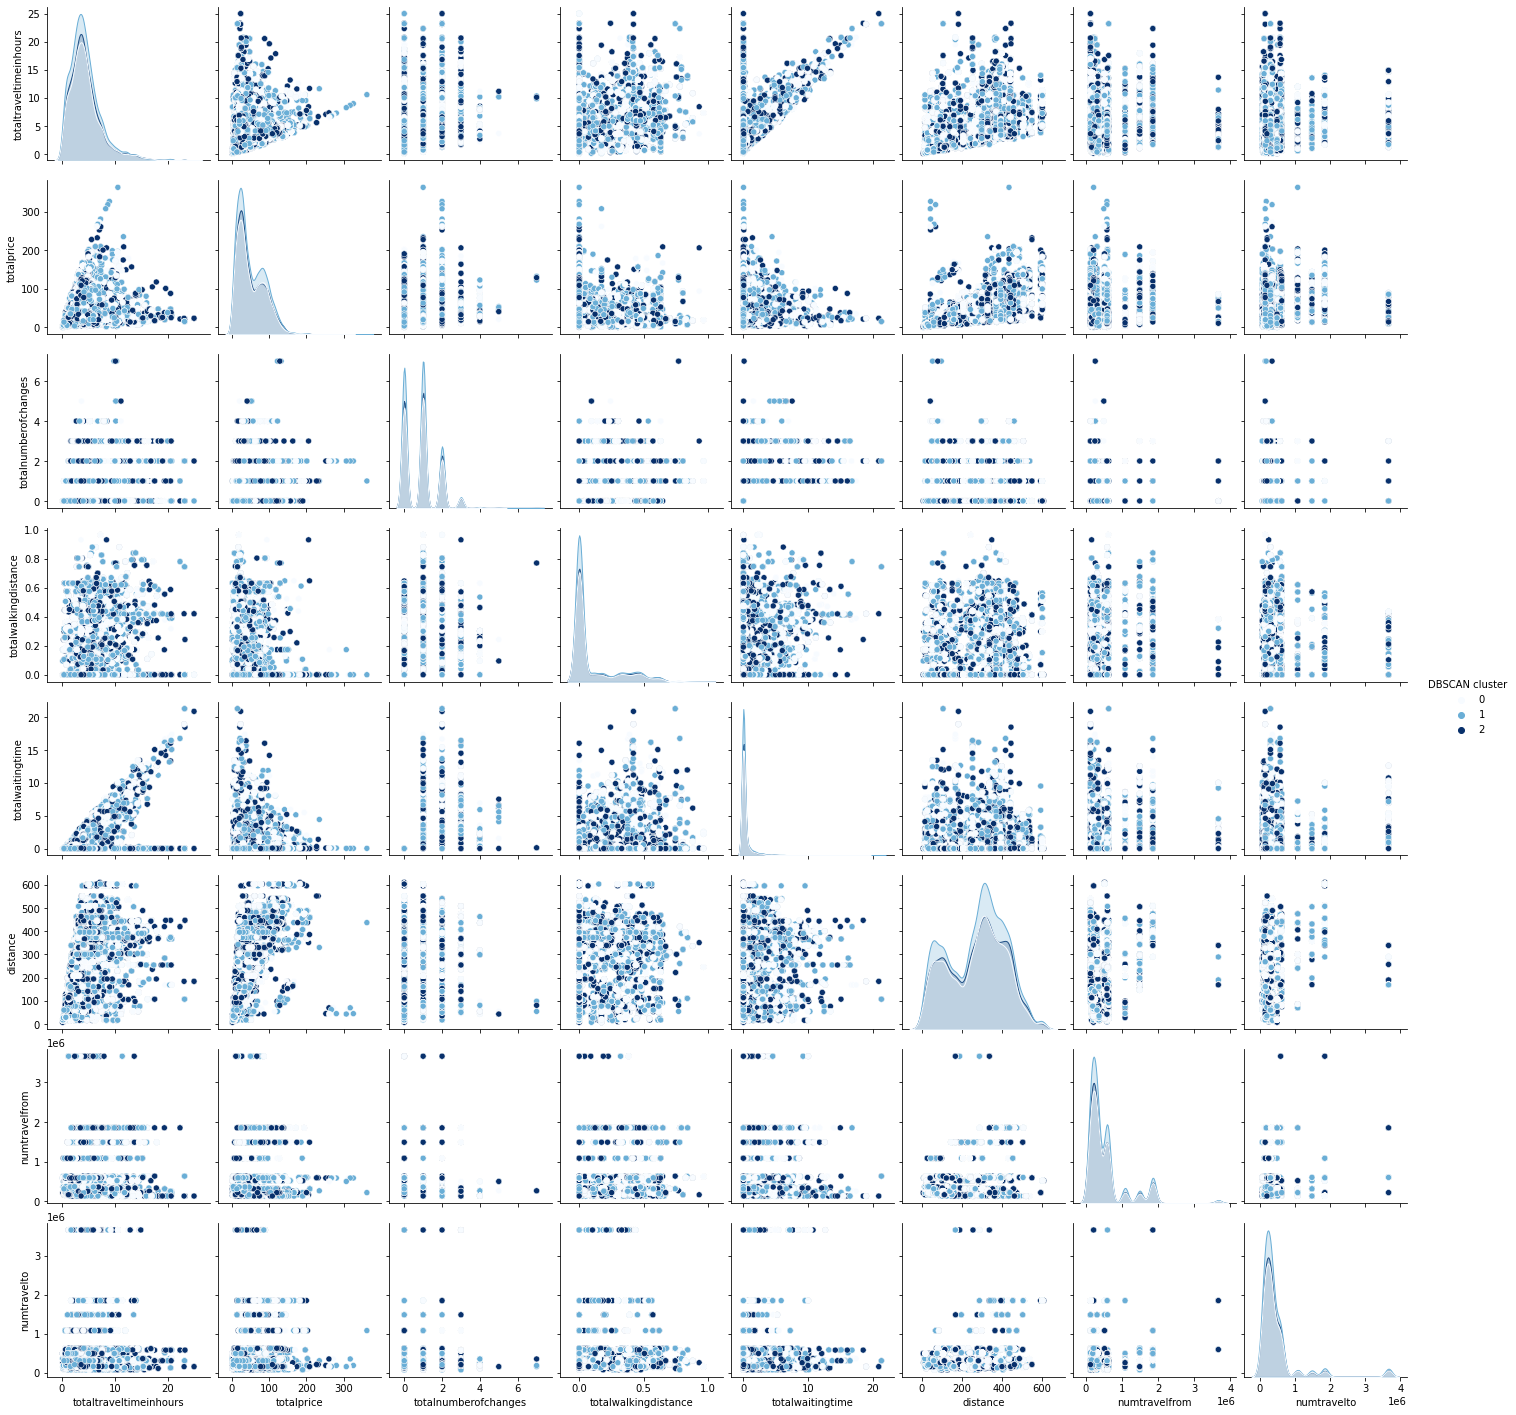

In [ ]:
#pairwise 3 clusters unscaled

sns.pairplot(df,vars=['totaltraveltimeinhours','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime', 'distance', 'numtravelfrom', 'numtravelto'],hue='DBSCAN cluster', palette ='Blues')

Again 0 (1st) cluster is moderate, 2d cluster (index 1) highest orice, 3d cluster highest travel time- dark blue

Groups are also shuffled, not distinct with respect to pairwise correlaion graph


In [ ]:
#three unique clusters
np.unique(lables)

array([0, 1, 2])

In [ ]:
#form the group for cluster 1 (moderate group)

cluster_1= df[df['DBSCAN cluster']== 0]
cluster_1.head(20) #get the results

totaltraveltimeinhours  totalprice  ...  numtravelto  DBSCAN cluster
2                        0.13        2.17  ...       259105               0
31165                    1.34       22.95  ...       308436               0
69372                    3.05       42.95  ...      1488202               0
69431                    3.65       94.48  ...       620523               0
31195                    1.23       26.40  ...       308436               0
31197                    1.42        9.92  ...       308436               0
31196                    1.17       25.77  ...       308436               0
69432                    3.78       35.20  ...       620523               0
69433                    3.73       35.23  ...       620523               0
31122                    2.47       15.04  ...       355004               0
31070                    2.47       15.04  ...       355004               0
69447                    4.00       44.21  ...       620523               0
69371                    3.07       42.60  ...      1488202               0
31031                    0.53        9.52  ...       188687               0
31119                    0.78       17.78  ...       355004               0
31223                    1.42        9.92  ...       308436               0
69278                    5.52       68.43  ...      1488202               0
69291                    2.80       46.03  ...      1488202               0
69368                    4.67       73.51  ...      1488202               0
69296                    4.67       73.51  ...      1488202               0

[20 rows x 12 columns]

mode-all

In [ ]:
#form the group for cluster 2

cluster_2= df[df['DBSCAN cluster']== 1]
cluster_2.head(20) #get the results

totaltraveltimeinhours  totalprice  ...  numtravelto  DBSCAN cluster
31168                    1.17       25.77  ...       308436               1
31169                    1.26       22.95  ...       308436               1
31170                    1.39       20.89  ...       308436               1
69375                    2.70       77.06  ...      1488202               1
69374                    2.73       78.59  ...      1488202               1
64546                    3.67      108.68  ...       582415               1
69473                    3.65       94.48  ...       620523               1
69373                    9.46       37.03  ...      1488202               1
69367                    2.80       74.33  ...      1488202               1
69446                    3.77       36.88  ...       620523               1
31033                    0.27        6.31  ...       188687               1
69444                    3.96       42.56  ...       620523               1
69294                    3.67       73.70  ...      1488202               1
69293                    3.80       41.98  ...      1488202               1
31091                    2.47       15.04  ...       355004               1
31220                    1.23       26.40  ...       308436               1
69445                    3.73       91.67  ...       620523               1
31221                    1.17       25.77  ...       308436               1
31219                    1.29       33.23  ...       308436               1
69297                    2.80       74.33  ...      1488202               1

[20 rows x 12 columns]

price is higher (expensive group)

In [ ]:
#form the group for cluster 3

cluster_3= df[df['DBSCAN cluster']== 2]
cluster_3.head(20) #get the results

totaltraveltimeinhours  totalprice  ...  numtravelto  DBSCAN cluster
31171                    1.42        9.92  ...       308436               2
31194                    1.29       33.23  ...       308436               2
65267                    4.20       11.00  ...       209566               2
69377                    2.80       46.03  ...      1488202               2
31368                    6.54       10.26  ...       248878               2
69376                    2.86       59.91  ...      1488202               2
31032                    0.28        8.41  ...       188687               2
69370                    4.08       42.60  ...      1488202               2
31055                    0.78       17.78  ...       355004               2
31056                    2.47       15.04  ...       355004               2
31069                    0.78       17.78  ...       355004               2
69443                    4.69       46.96  ...       620523               2
69442                    3.96       40.82  ...       620523               2
69441                    3.73       35.23  ...       620523               2
69440                    3.65       94.48  ...       620523               2
31351                    2.60       28.81  ...       248878               2
31352                    1.83       28.85  ...       248878               2
31363                    1.49       33.87  ...       248878               2
31364                    1.60       28.88  ...       248878               2
31365                    2.93       22.61  ...       248878               2

[20 rows x 12 columns]

price is lower

In [ ]:
def minvalue(data):
  minvalue = data[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance', 'numtravelfrom', 'numtravelto' ]].min()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance'& 'numtravelfrom'& 'numtravelto': ")
  print(minvalue)

minvalue(cluster_1)
minvalue(cluster_2)
minvalue(cluster_3)


minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance'& 'numtravelfrom'& 'numtravelto': 
totaltraveltimeinhours         0.120
totalwaitingtime               0.000
totalnumberofchanges           0.000
totalwalkingdistance           0.000
totalprice                     0.720
distance                       7.404
numtravelfrom             126405.000
numtravelto                76674.000
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance'& 'numtravelfrom'& 'numtravelto': 
totaltraveltimeinhours         0.120
totalwaitingtime               0.000
totalnumberofchanges           0.000
totalwalkingdistance           0.000
totalprice                     0.720
distance                       7.404
numtravelfrom             126405.000
numtravelto                76674.000
dtype: float64
minimum value in colum

In [ ]:
#investigate the group with respect to max value
def maxvalue(d):
  maxvalue = d[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance', 'numtravelfrom', 'numtravelto']].max()
  print("maximum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice' &'distance'& 'numtravelfrom'& 'numtravelto': ")
  print(maxvalue)

maxvalue(cluster_1)
maxvalue(cluster_2)
maxvalue(cluster_3)




maximum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice' &'distance'& 'numtravelfrom'& 'numtravelto': 
totaltraveltimeinhours         25.000
totalwaitingtime               18.930
totalnumberofchanges            5.000
totalwalkingdistance            0.965
totalprice                    313.070
distance                      609.816
numtravelfrom             3664088.000
numtravelto               3664088.000
dtype: float64
maximum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice' &'distance'& 'numtravelfrom'& 'numtravelto': 
totaltraveltimeinhours         25.000
totalwaitingtime               21.290
totalnumberofchanges            7.000
totalwalkingdistance            0.965
totalprice                    362.740
distance                      609.816
numtravelfrom             3664088.000
numtravelto               3664088.000
dtype: float64
maximu

In [ ]:
#investigate the group with respect to mean value

def meanvalue(dat):
  meanvalue = dat[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance', 'numtravelfrom', 'numtravelto']].mean()
  print("mean value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': ")
  print(meanvalue)

meanvalue(cluster_1)
meanvalue(cluster_2)
meanvalue(cluster_3)

#values in general

mean value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': 
totaltraveltimeinhours         4.520716
totalwaitingtime               0.494383
totalnumberofchanges           0.890925
totalwalkingdistance           0.106646
totalprice                    51.147630
distance                     274.363730
numtravelfrom             548042.109834
numtravelto               486648.419495
dtype: float64
mean value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': 
totaltraveltimeinhours         4.478043
totalwaitingtime               0.464051
totalnumberofchanges           0.853621
totalwalkingdistance           0.104866
totalprice                    51.295816
distance                     276.366429
numtravelfrom             538699.115454
numtravelto               488444.015634
dtype: float64
mean value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 

no distinctive mean

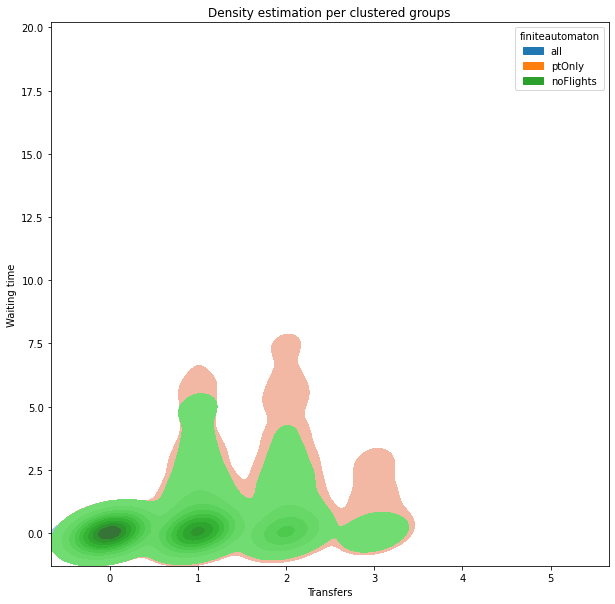

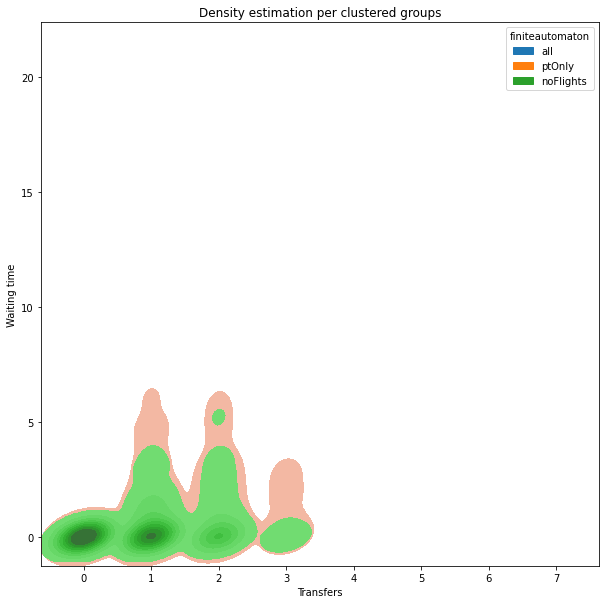

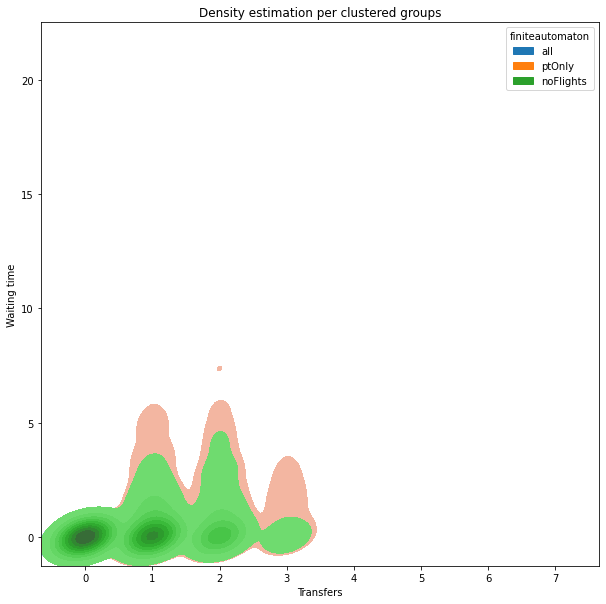

In [ ]:
#density graphs

def plot1(data):
  plt.figure(figsize=(10,10))#check the size
  sns.kdeplot(x=data.totalnumberofchanges,y=data.totalwaitingtime,hue=data.finiteautomaton,shade=True)
  plt.title('Density estimation per clustered groups')
  plt.xlabel('Transfers')
  plt.ylabel("Waiting time")

plot1(cluster_1)
plot1(cluster_2)
plot1(cluster_3)


1st and 3d group-0 transfers-noflights
cant detect the mode of all as dense one

1st group with 2 trabsfers the highest time for public transport only

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



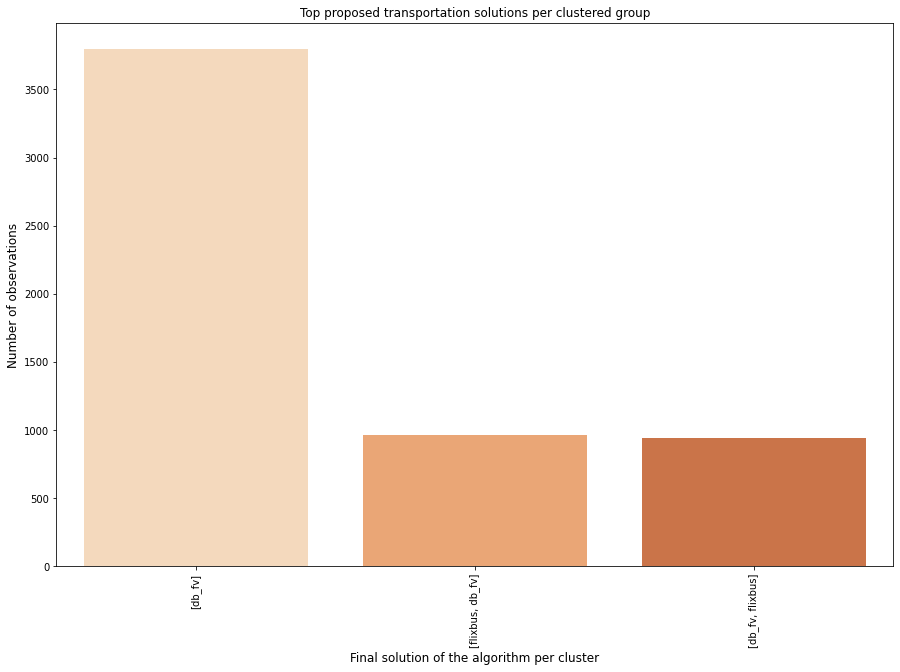

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



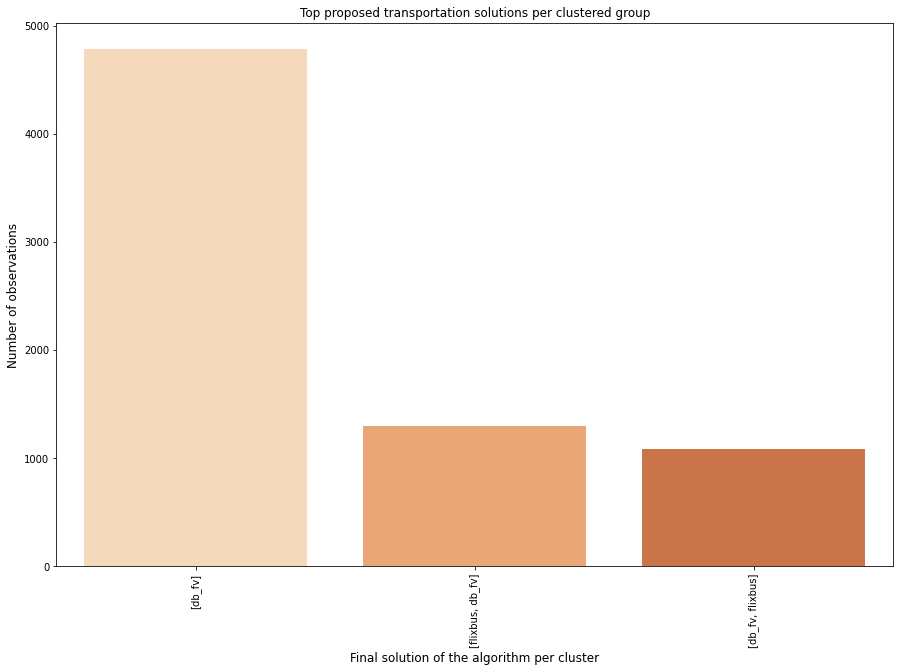

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



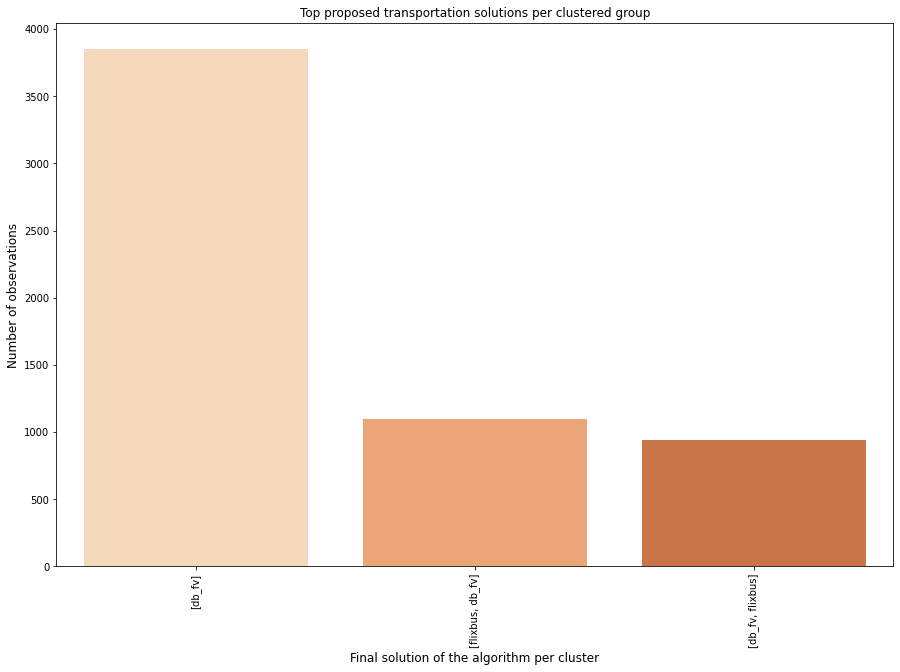

In [ ]:
def plot2(data):
# top proposed solutions
  cnt_srs = data['finalsolutionusedlabels'].value_counts().nlargest(3)
  plt.figure(figsize=(15,10))
  sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="Oranges")
  plt.title('Top proposed transportation solutions per clustered group')
  plt.xticks(rotation='vertical')
  plt.xlabel('Final solution of the algorithm per cluster', fontsize=12)
  plt.ylabel('Number of observations', fontsize=12)
  plt.show()

plot2(cluster_1)
plot2(cluster_2)
plot2(cluster_3)


Same top transport labels everywhere (train and flixbus combinations)

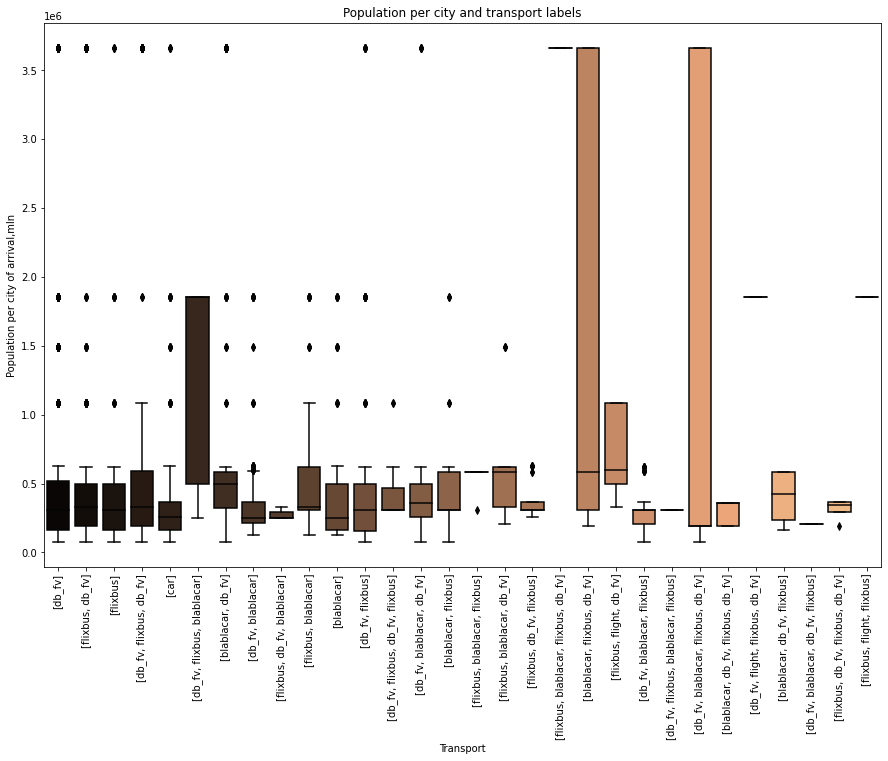

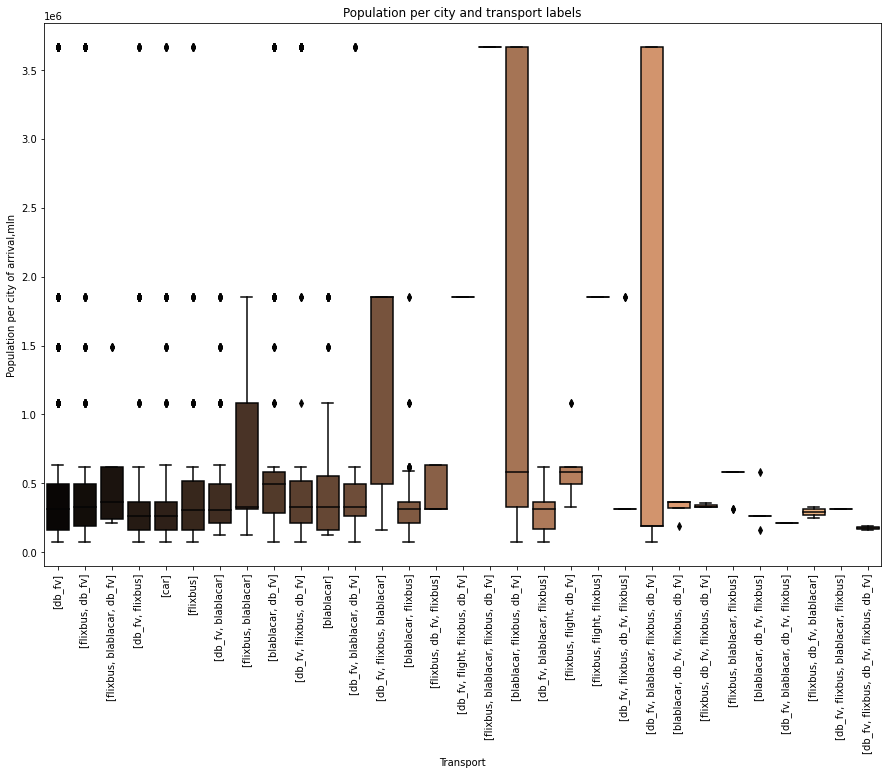

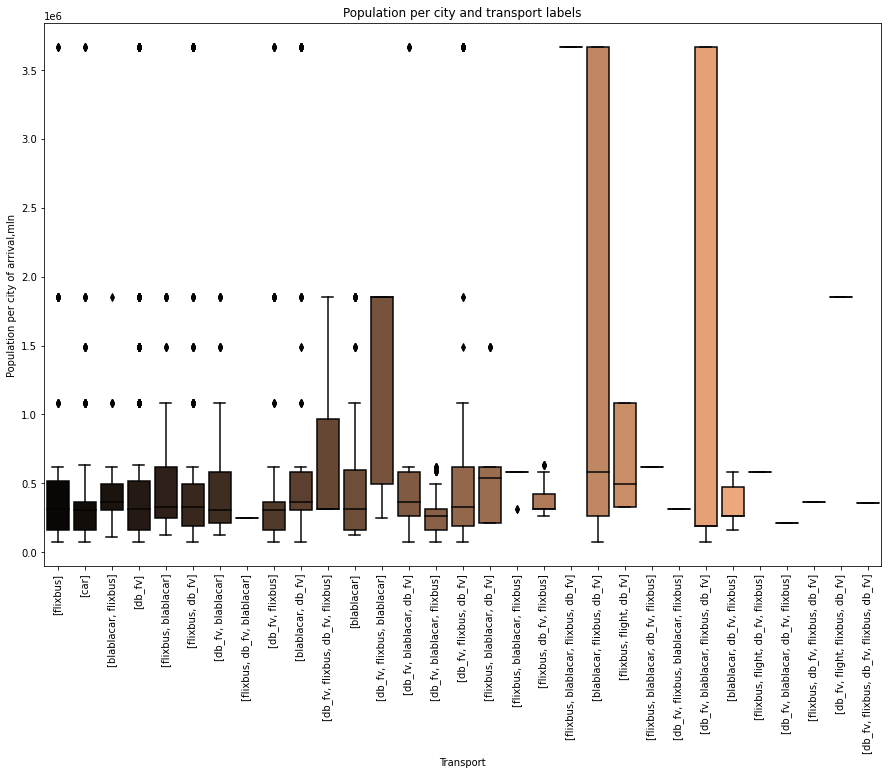

In [ ]:
#plot the data to reveal the mode types per city of going to

def plot3(datt):
  plt.figure(figsize=(15, 10))
  sns.boxplot(data=datt,x="finalsolutionusedlabels", y='numtravelto',palette='copper')#take care about variables of the data
  plt.title('Population per city and transport labels')
  plt.xticks(rotation='vertical')
  plt.xlabel('Transport')
  plt.ylabel("Population per city of arrival,mln")


plot3(cluster_1)
plot3(cluster_2)
plot3(cluster_3)

all mix of transport solutions inside, all groups travel to metropolis via same 2 modes-train, blablacar,flixbus and combinations